In [35]:
#import the libraries
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#Load the data and split into test set and train set
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [37]:
#get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


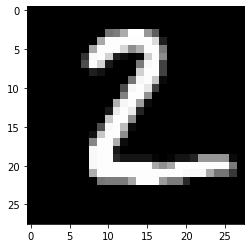

In [38]:
#print image
plt.imshow(X_test[1])

In [39]:
#reshape the data to fit the model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [40]:
#one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [41]:
#print the new label
print(y_train_one_hot[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [42]:
#build the CNN model
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation= "relu",input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [43]:
#compile the model
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [44]:
#train the model
hist = model.fit(X_train,y_train_one_hot, validation_data =(X_test,y_test_one_hot),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 176s 87ms/step - loss: 0.6366 - accuracy: 0.9116 - val_loss: 0.0937 - val_accuracy: 0.9713
Epoch 2/3
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0691 - accuracy: 0.9785 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 3/3
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.1114 - val_accuracy: 0.9694


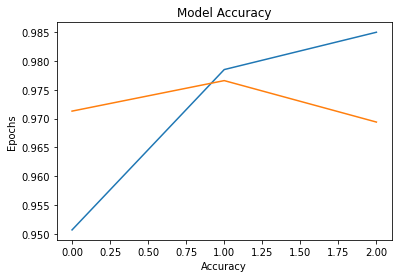

In [46]:
#visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.title('Model Accuracy')
plt.show()

In [56]:
#Show the predictions as probabilities for any four images in the test set
predictions=model.predict(X_test[2:6])
predictions 

array([[3.1097203e-02, 9.6142071e-01, 3.2273934e-03, 4.1448665e-08,
        2.4818336e-03, 4.1406911e-06, 1.4446452e-03, 8.5414705e-08,
        3.2256241e-04, 1.3984758e-06],
       [9.9999607e-01, 4.5087371e-12, 1.3457930e-06, 1.7652669e-08,
        4.6700124e-09, 1.0075886e-09, 1.9136517e-06, 1.8634309e-11,
        3.1049707e-09, 7.0597372e-07],
       [7.1475229e-16, 2.4930930e-16, 7.2985983e-15, 2.7235988e-13,
        1.0000000e+00, 4.5846122e-14, 1.1587332e-15, 1.8418591e-14,
        1.0117264e-14, 8.4680494e-13],
       [1.8743040e-04, 9.9951446e-01, 1.3066670e-04, 2.5331241e-08,
        1.3000406e-04, 4.0120323e-08, 3.3876684e-06, 7.9397915e-07,
        3.3195814e-05, 3.7686828e-08]], dtype=float32)

In [57]:
#print out the predictions as numbers for any 4 numbers
print(np.argmax(predictions,axis=1))

[1 0 4 1]


In [65]:
#print out the actual labels
print(y_test[2:6])

[1 0 4 1]


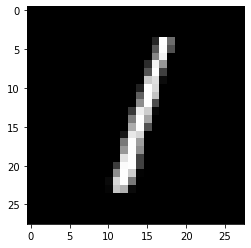

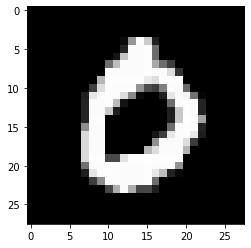

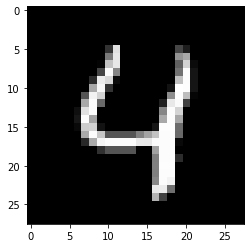

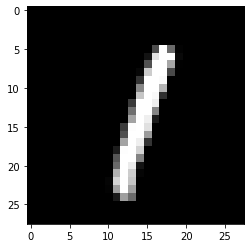

In [67]:
#Show the above four numbers as pictures
for i in range(2,6):
  image=X_test[i]
  image=np.array(image,dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()